<h1>Discrete Fourier Transform Demostration </h1>
<p> Tim Zhou - JMSS MCP project </p>

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import linspace,ones_like,real,imag,cos,sin,pi,exp,arange,mod

plt.style.use('seaborn-poster')
%matplotlib inline

C:\Users\2005t\AppData\Local\Temp\ipykernel_3344\2215180179.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


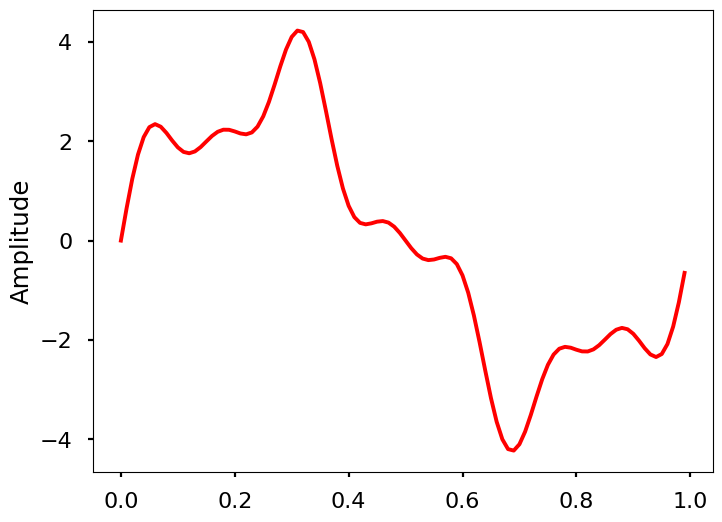

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [5]:
from IPython.display import Image

Image(url="24.02.02-time_frequency.png", width=500,height=500)

<p>This here is the addition of the 3 sin wave functions</p>

<p>each function are</p>

$3\sin(2 \pi f t)$ : 4 Hz (amplitude: 3) <br>
$\sin(2 \pi f t)$   : 1 Hz (amplitude: 1) <br>
$\frac{1}{2} \sin(2 \pi f t)$  : 7 Hz (amplitude $\frac{1}{2}$) <br>


In [6]:
def DFT(x):
    #We want to keep (n) the real space, while (k) the frequency space
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N,1))
    e = np.exp(-2j * np.pi*k*n/N)

    #The exponential
    X = np.dot(e,x)

    return X

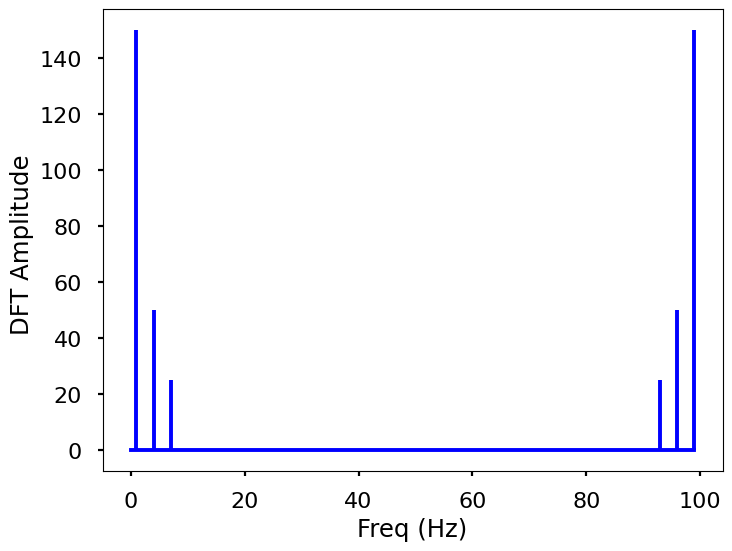

In [8]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude ')
plt.show()

<p> We can see from the DFT graph is a symmertrical half of the sampling rate shown from above. This representation is of the frequency space. </p>
<p> Thus from this, we can state that a singal sampled at any rate can be fully constructed only frequency components below half that samplung frequency. </p>

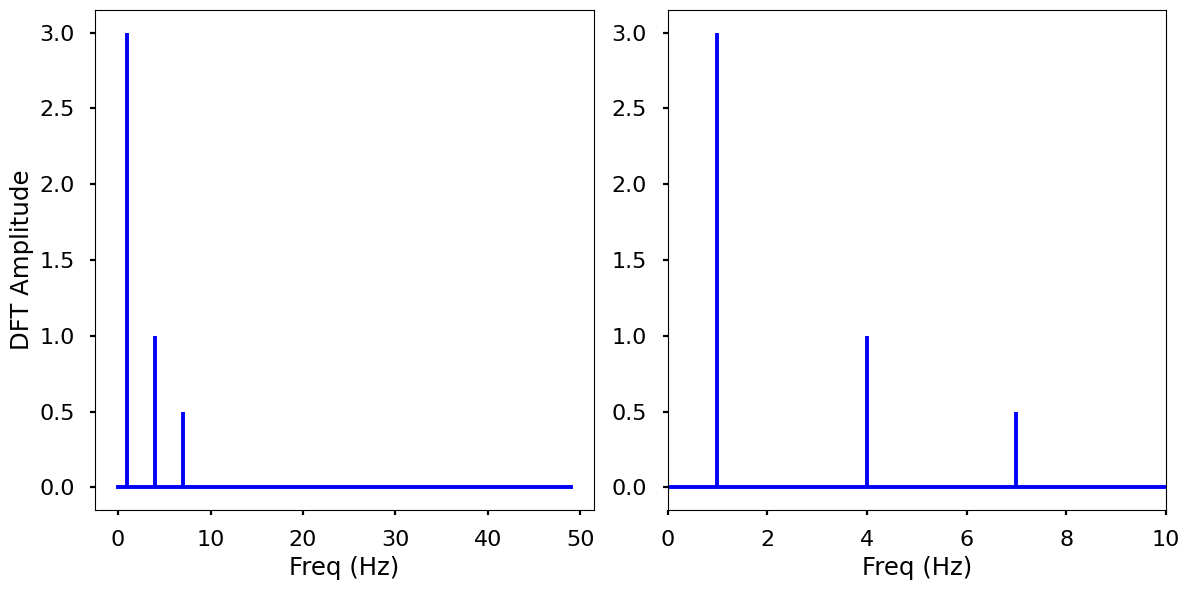

In [9]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

<p> We can see by plotting the first half of the DFT results, we can see 3 clear peaks at 1, 4 and 7 Hz, which is in comparison to the orignal sine functions having periods of 1, 4 and 7 Hz.</p>
<p> This is how we can see the DFT and analyse the arbitary signals when decomposed down to its simplest sine waves, and represented in the frequency space </p>

<p> Using this, we can find do a similar visualisation of this however, using points on a imaginary plane to make epicycles. </p>
<p> This will be done in mathematica, while a short demo will be illustrated here </p>


Let $N=4$ and

$$\mathbf{x} =
    \begin{pmatrix}
    x_0 \\ x_1 \\ x_2 \\ x_3
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 \\ 2-i \\ -i \\ -1+2i
    \end{pmatrix}$$


Here we demonstrate how to calculate the DFT of $\mathbf{x}$ using DFT:

: $X_0 = e^{-i 2 \pi 0 \cdot 0 / 4} \cdot 1 + e^{-i 2 \pi 0 \cdot 1 / 4} \cdot (2-i) + e^{-i 2 \pi 0 \cdot 2 / 4} \cdot (-i) + e^{-i 2 \pi 0 \cdot 3 / 4} \cdot (-1+2i) = 2$

: $X_1 = e^{-i 2 \pi 1 \cdot 0 / 4} \cdot 1 + e^{-i 2 \pi 1 \cdot 1 / 4} \cdot (2-i) + e^{-i 2 \pi 1 \cdot 2 / 4} \cdot (-i) + e^{-i 2 \pi 1 \cdot 3 / 4} \cdot (-1+2i) = -2-2i$

: $X_2 = e^{-i 2 \pi 2 \cdot 0 / 4} \cdot 1 + e^{-i 2 \pi 2 \cdot 1 / 4} \cdot (2-i) + e^{-i 2 \pi 2 \cdot 2 / 4} \cdot (-i) + e^{-i 2 \pi 2 \cdot 3 / 4} \cdot (-1+2i) = -2i$

: $X_3 = e^{-i 2 \pi 3 \cdot 0 / 4} \cdot 1 + e^{-i 2 \pi 3 \cdot 1 / 4} \cdot (2-i) + e^{-i 2 \pi 3 \cdot 2 / 4} \cdot (-i) + e^{-i 2 \pi 3 \cdot 3 / 4} \cdot (-1+2i) = 4+4i$

: $$\mathbf{X} =
    \begin{pmatrix}
    X_0 \\
    X_1 \\
    X_2 \\
    X_3
    \end{pmatrix}
    =
    \begin{pmatrix}
    2 \\
    -2-2i \\
    -2i \\
    4+4i
    \end{pmatrix}
    $$


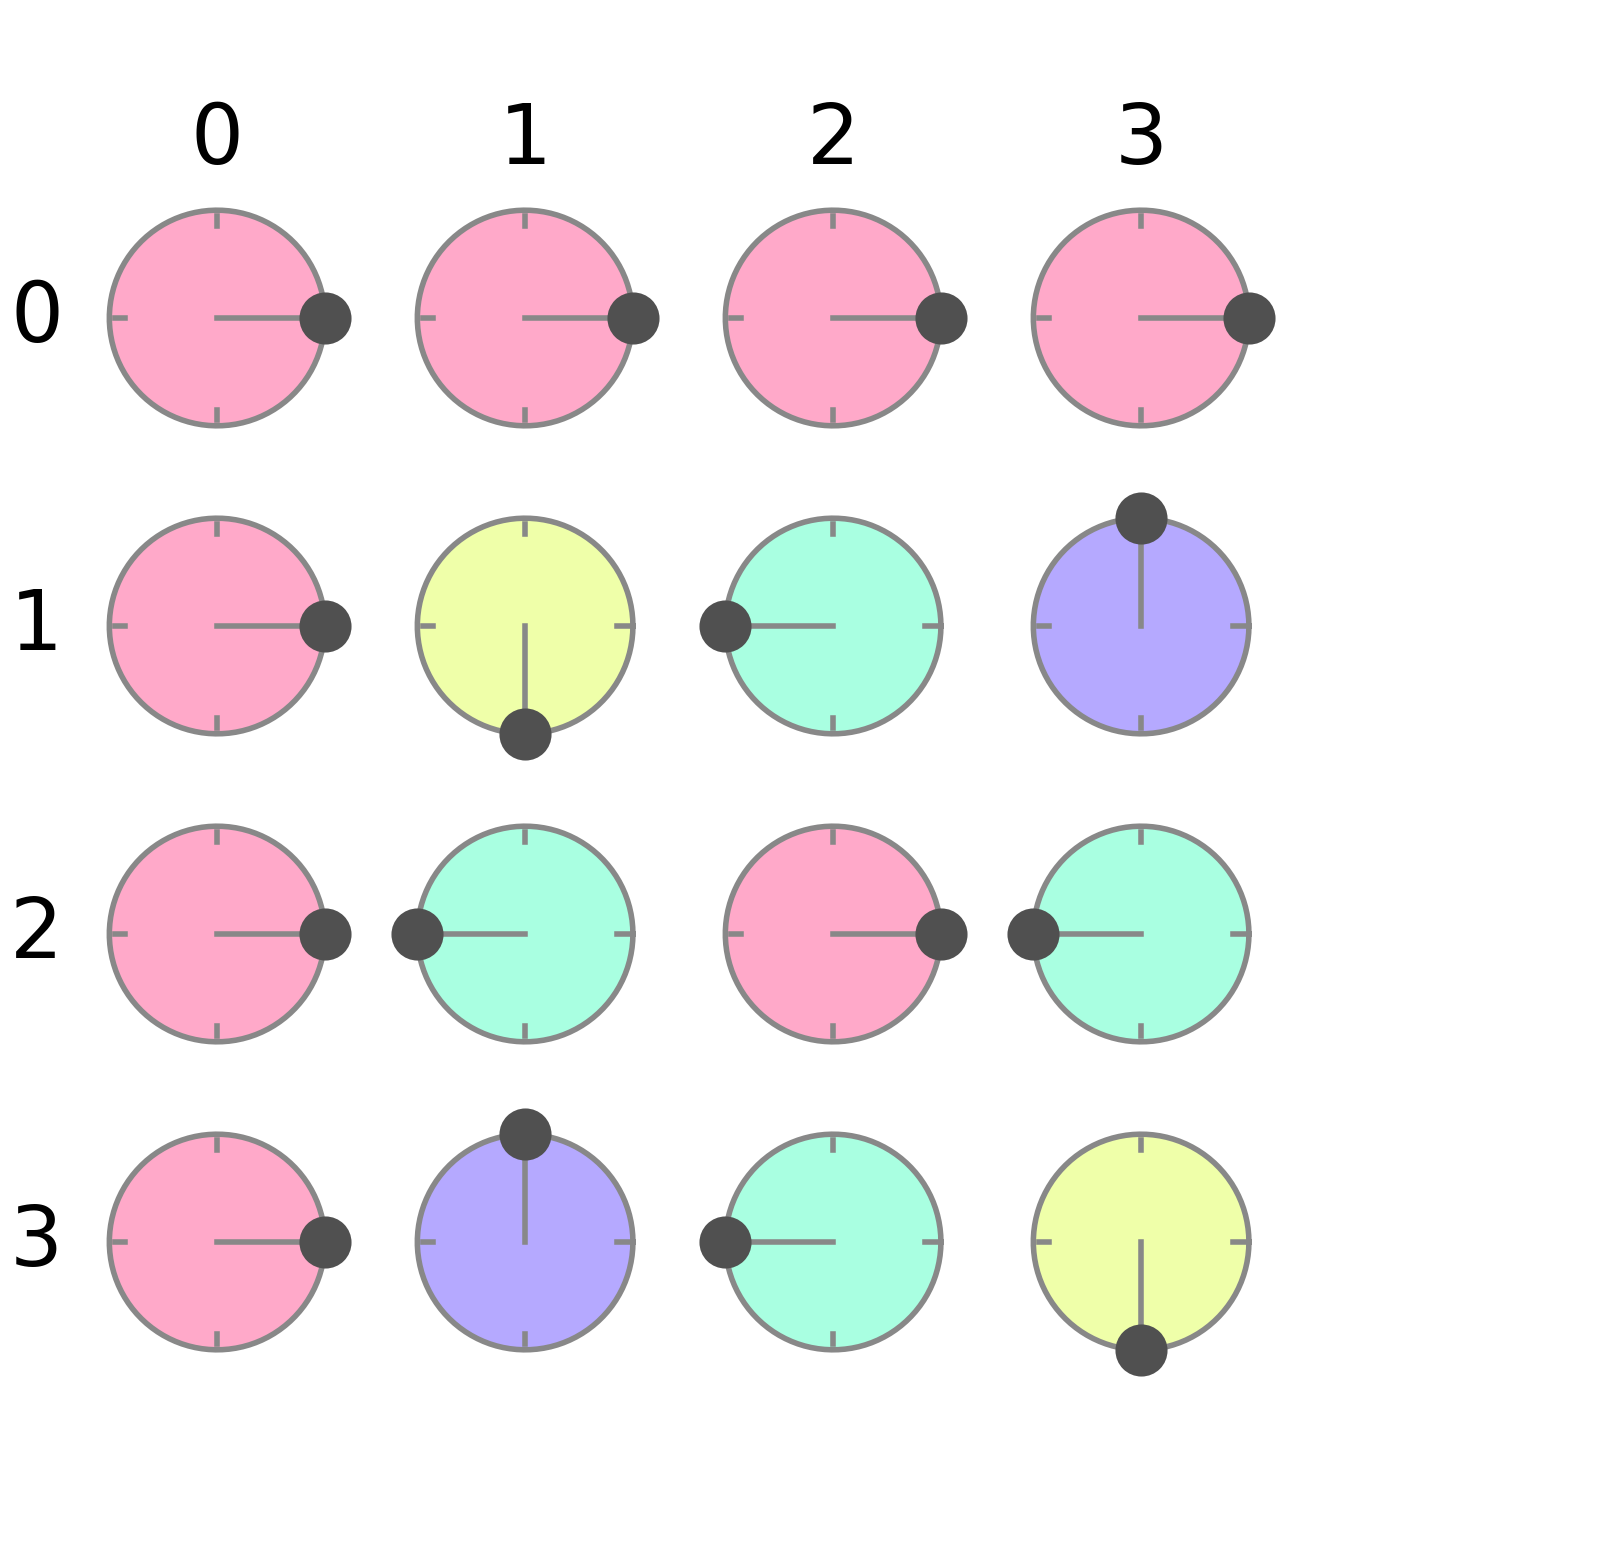

In [17]:
def fft_matrix_viz(n):
    L = 1.
    vsep = -1.
    lwfac = 4
    markersize = 75./float(n)/2 *lwfac
    i = complex(0.,1.)
    t = linspace(0,L,501,endpoint=True)
    kvals = range(0,n)#-n//2,n)
    colormap = cm.get_cmap('hsv') # a cyclic colormap
    nc = len(kvals)
    cmrotation = 0.95 #0.8  #0.05
    colors = colormap( mod( linspace(0,1,nc,endpoint=False) + cmrotation, 1 ) )  # get nc colors from the colormap
    # pastelize colors
    p = 0.55
    colors = (1-p)*colors + p*ones_like(colors)
    # darken colors
    d = 1 #0.9
    colors *= [d,d,d,1]
    clockcolor = '#888888'
    fontsize = 20*4/n*1.5*2
    figsize = 20
    plt.figure(figsize=(figsize,figsize))

    theta = linspace(0,2*pi,100)
    c = cos(theta)
    s = sin(theta)
    def plotZ(x,y,Z):
        radius = 0.35 
        tickfraci = 0.15
        tickfraco = 0.05
        color = colors[(j*k)%len(kvals)]
        plt.fill(x+radius*c, y+radius*s,color=color,alpha=.75)  # fill unit circle
        plt.plot(x+radius*c, y+radius*s,color=clockcolor,lw=lwfac,alpha=1)#0.35)  # draw unit circle
        for ticktheta in linspace(0,2*pi,n,endpoint=False):  # draw ticks
            tc,ts = cos(ticktheta),sin(ticktheta)
            plt.plot([x+(1-tickfraci)*radius*tc,x+(1-tickfraco)*radius*tc],[y+(1-tickfraci)*radius*ts,y+(1-tickfraco)*radius*ts],color=clockcolor,lw=lwfac,alpha=1)#0.35) 
        plt.plot([x,x+radius*real(Z)],[y,y+radius*imag(Z)],color=clockcolor,lw=lwfac,alpha=1)#0.35) # draw radius
        plt.plot(x+radius*real(Z),y+radius*imag(Z),'o',markersize=markersize,color='#505050',alpha=1) # mark Z

    plt.subplot(1,1,1,aspect=1,frameon=False)
    for k in kvals:
        zd = exp(-2*pi*i*k*arange(n)/float(n))
        for j,Z in enumerate(zd): plotZ(j,vsep*k,Z)
        plt.text(-0.5,vsep*k,str(k),va='center',ha='right',fontsize=fontsize)

    for j in range(n):
        plt.text(j,vsep*(min(kvals)-0.50),str(j),ha='center',fontsize=fontsize)
    plt.xlim(-.5,n+.5)
    plt.ylim(vsep*(max(kvals)+1),vsep*(min(kvals)-1))
    plt.xticks([])
    plt.yticks([])

fft_matrix_viz(4)

<p> These lines facing a direction on the circle represents the direction in which the epicycles will begin, through the use of DFT. </p>


<h3>Bibliography</h3>
<p>Discrete Fourier Transform (DFT) — Python Numerical Methods. (n.d.). Pythonnumericalmethods.berkeley.edu. https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html</p>
<p>FFT · Arcane Algorithm Archive. (n.d.). Www.algorithm-Archive.org. Retrieved October 12, 2022, from https://www.algorithm-archive.org/contents/cooley_tukey/cooley_tukey.html </p>

‌
‌